In [1]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

#The model is a part of MediaPipe, an open-source framework by Google.
#It is publicly available and well-documented, designed to facilitate hand landmark detection in various applications.
#The hand_landmarker.task file is a TensorFlow Lite model, specifically tailored for efficient, lightweight, and real-time hand detection.
#access through here: https://ai.google.dev/edge/mediapipe/solutions/guide


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Import Kaggle API to download dataset
!pip install kaggle  # Install Kaggle API if not already installed
from google.colab import files

# Upload your Kaggle API key file (kaggle.json)
files.upload()

# Configure Kaggle API
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the ASL dataset from Kaggle
!kaggle datasets download -d ayuraj/asl-dataset
!unzip asl-dataset.zip -d /content/asl_dataset

# Set the directory path to the downloaded dataset
directory_path = '/content/asl_dataset'
folders_list = []

# Directory listing
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path):
        folders_list += [item]
    elif os.path.isdir(item_path):
        folders_list += [f'{item}:{len(os.listdir(item_path))}']

print(f'Folders: {folders_list}')

# Output information about the dataset location
print(f'Your dataset has been downloaded and is located at: {directory_path}')


Streaming output truncated to the last 5000 lines.
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_dif_seg_3_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_dif_seg_4_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_dif_seg_5_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_left_seg_1_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_left_seg_2_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_left_seg_3_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_left_seg_4_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_left_seg_5_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_right_seg_1_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_right_seg_2_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0/hand2_0_right_seg_3_cropped.jpeg  
  inflating: /content/asl_dataset/asl_dataset/0

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os, cv2

#directory_path = r"dataset\asl_dataset"  # Incorrect path.
directory_path = "/content/dataset/asl_dataset"    # The actual path to the downloaded dataset
folders_list = []


# Directory listing
for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path):
        folders_list += [item]
    elif os.path.isdir(item_path):
        folders_list += [f'{item}:{len(os.listdir(item_path))}']

# Sort the folders_list alphabetically
folders_list = sorted(folders_list)  # This line sorts the list

print(f'Folders: {folders_list}')

Folders: ['0:70', '1:70', '2:70', '3:70', '4:70', '5:70', '6:70', '7:70', '8:70', '9:70', 'a:70', 'asl_dataset:36', 'b:70', 'c:70', 'd:70', 'e:70', 'f:70', 'g:70', 'h:70', 'i:70', 'j:70', 'k:70', 'l:70', 'm:70', 'n:70', 'o:70', 'p:70', 'q:70', 'r:70', 's:70', 't:65', 'u:70', 'v:70', 'w:70', 'x:70', 'y:70', 'z:70']


In [11]:
# We implemented some functions to visualize the hand landmark detection results.
# Run the following cell to activate the functions.
!pip install mediapipe
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

  return annotated_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 45.2 MB/s eta 0:00:00


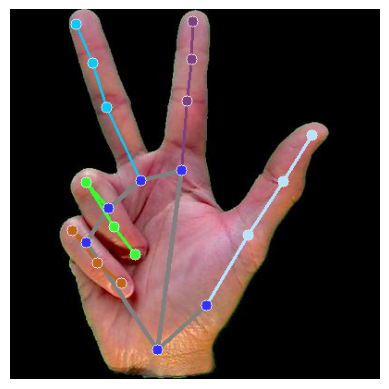

Landmarks:
[0.3992310166358948, 0.9219660758972168, 1.2486378864196013e-06]
[0.5318500995635986, 0.8014317154884338, -0.10624101012945175]
[0.6437766551971436, 0.6107847094535828, -0.13280731439590454]
[0.7380321025848389, 0.4658561646938324, -0.15355443954467773]
[0.8154817819595337, 0.3403623104095459, -0.17063000798225403]
[0.4626848101615906, 0.43724337220191956, -0.040514588356018066]
[0.4792848825454712, 0.24909599125385284, -0.07725273817777634]
[0.490261048078537, 0.13536861538887024, -0.1016649603843689]
[0.49326956272125244, 0.03397378325462341, -0.12094150483608246]
[0.35364246368408203, 0.4643281102180481, -0.03307114541530609]
[0.2616311013698578, 0.2654210925102234, -0.08761868625879288]
[0.22385409474372864, 0.14544814825057983, -0.1282976269721985]
[0.17927247285842896, 0.04057741165161133, -0.1487276554107666]
[0.2658873498439789, 0.5388702154159546, -0.040952712297439575]
[0.20699945092201233, 0.46878644824028015, -0.1499229371547699]
[0.2806200385093689, 0.5898663997

In [16]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt

BaseOptions = mp.tasks.BaseOptions

# Create an HandLandmarker object.
#base_options = python.BaseOptions(model_asset_path= r"C:\Users\inonz\Desktop\pythone\hand recognition\hand_recognition\data\hand_landmarker.task")

model_file = open(r"hand_landmarker.task", "rb")
model_data = model_file.read()
model_file.close()

base_options = python.BaseOptions(model_asset_buffer=model_data)

options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# Detect hand landmarks from the input image
image = mp.Image.create_from_file("/content/dataset/asl_dataset/3/hand1_3_bot_seg_2_cropped.jpeg")
detection_result = detector.detect(image)

# Process the classification result and visualize it
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(annotated_image)
plt.axis("off")
plt.show()

print('Landmarks:')
for landmark in detection_result.hand_landmarks[0]:
    print([landmark.x, landmark.y, landmark.z])

landmarks_cnt = len(detection_result.hand_landmarks[0])
print(f'landmarks count: {landmarks_cnt}')

In [17]:
from PIL import Image, ImageOps

images, source_df = [], []
skipped_images = 0

# Create numpy array with classes and images
for folder in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder)

    if os.path.isdir(folder_path):
        for item in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item)
            if os.path.isfile(item_path):

                # Reading an image and adding a black border for more stable landmark detection
                border_size = 100
                source_img = Image.open(item_path)
                img = np.array(ImageOps.expand(source_img, border=border_size, fill='black'))
                img = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
                detection_result = detector.detect(img)

                if len(detection_result.hand_landmarks) > 0:
                    annotated_image = draw_landmarks_on_image(img.numpy_view(), detection_result)
                    annotated_image = annotated_image[border_size:-border_size, border_size:-border_size]

                    landmarks = [[lm.x, lm.y, lm.z] for lm in detection_result.hand_landmarks[0]]
                    source_df += [{"class": folder,
                                  "image": np.array(source_img),
                                  "annotated_image": annotated_image,
                                  "landmarks": landmarks
                                  }]
                else:
                    skipped_images += 1

print(f'images:{len(source_df)}  skipped:{skipped_images}')
source_df = pd.DataFrame(source_df)

images:2374  skipped:141


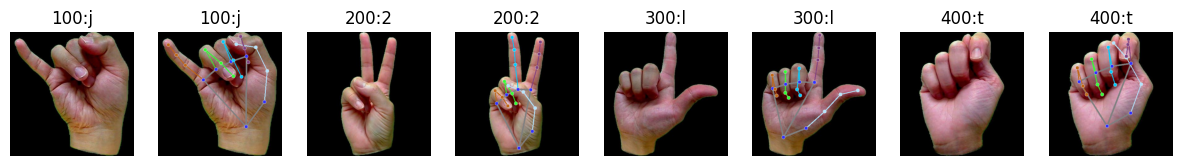

In [18]:
img_nums = (100, 200, 300, 400)

plt.figure(figsize=(15, 3))

for i in range(4):
    row = source_df.iloc[img_nums[i]]

    plt.subplot(1, 8, i*2+1)
    plt.imshow(row['image'])
    plt.title(f"{img_nums[i]}:{row['class']}")
    plt.axis("off")

    plt.subplot(1, 8, i*2+2)
    plt.imshow(row['annotated_image'])
    plt.title(f"{img_nums[i]}:{row['class']}")
    plt.axis("off")

plt.show()

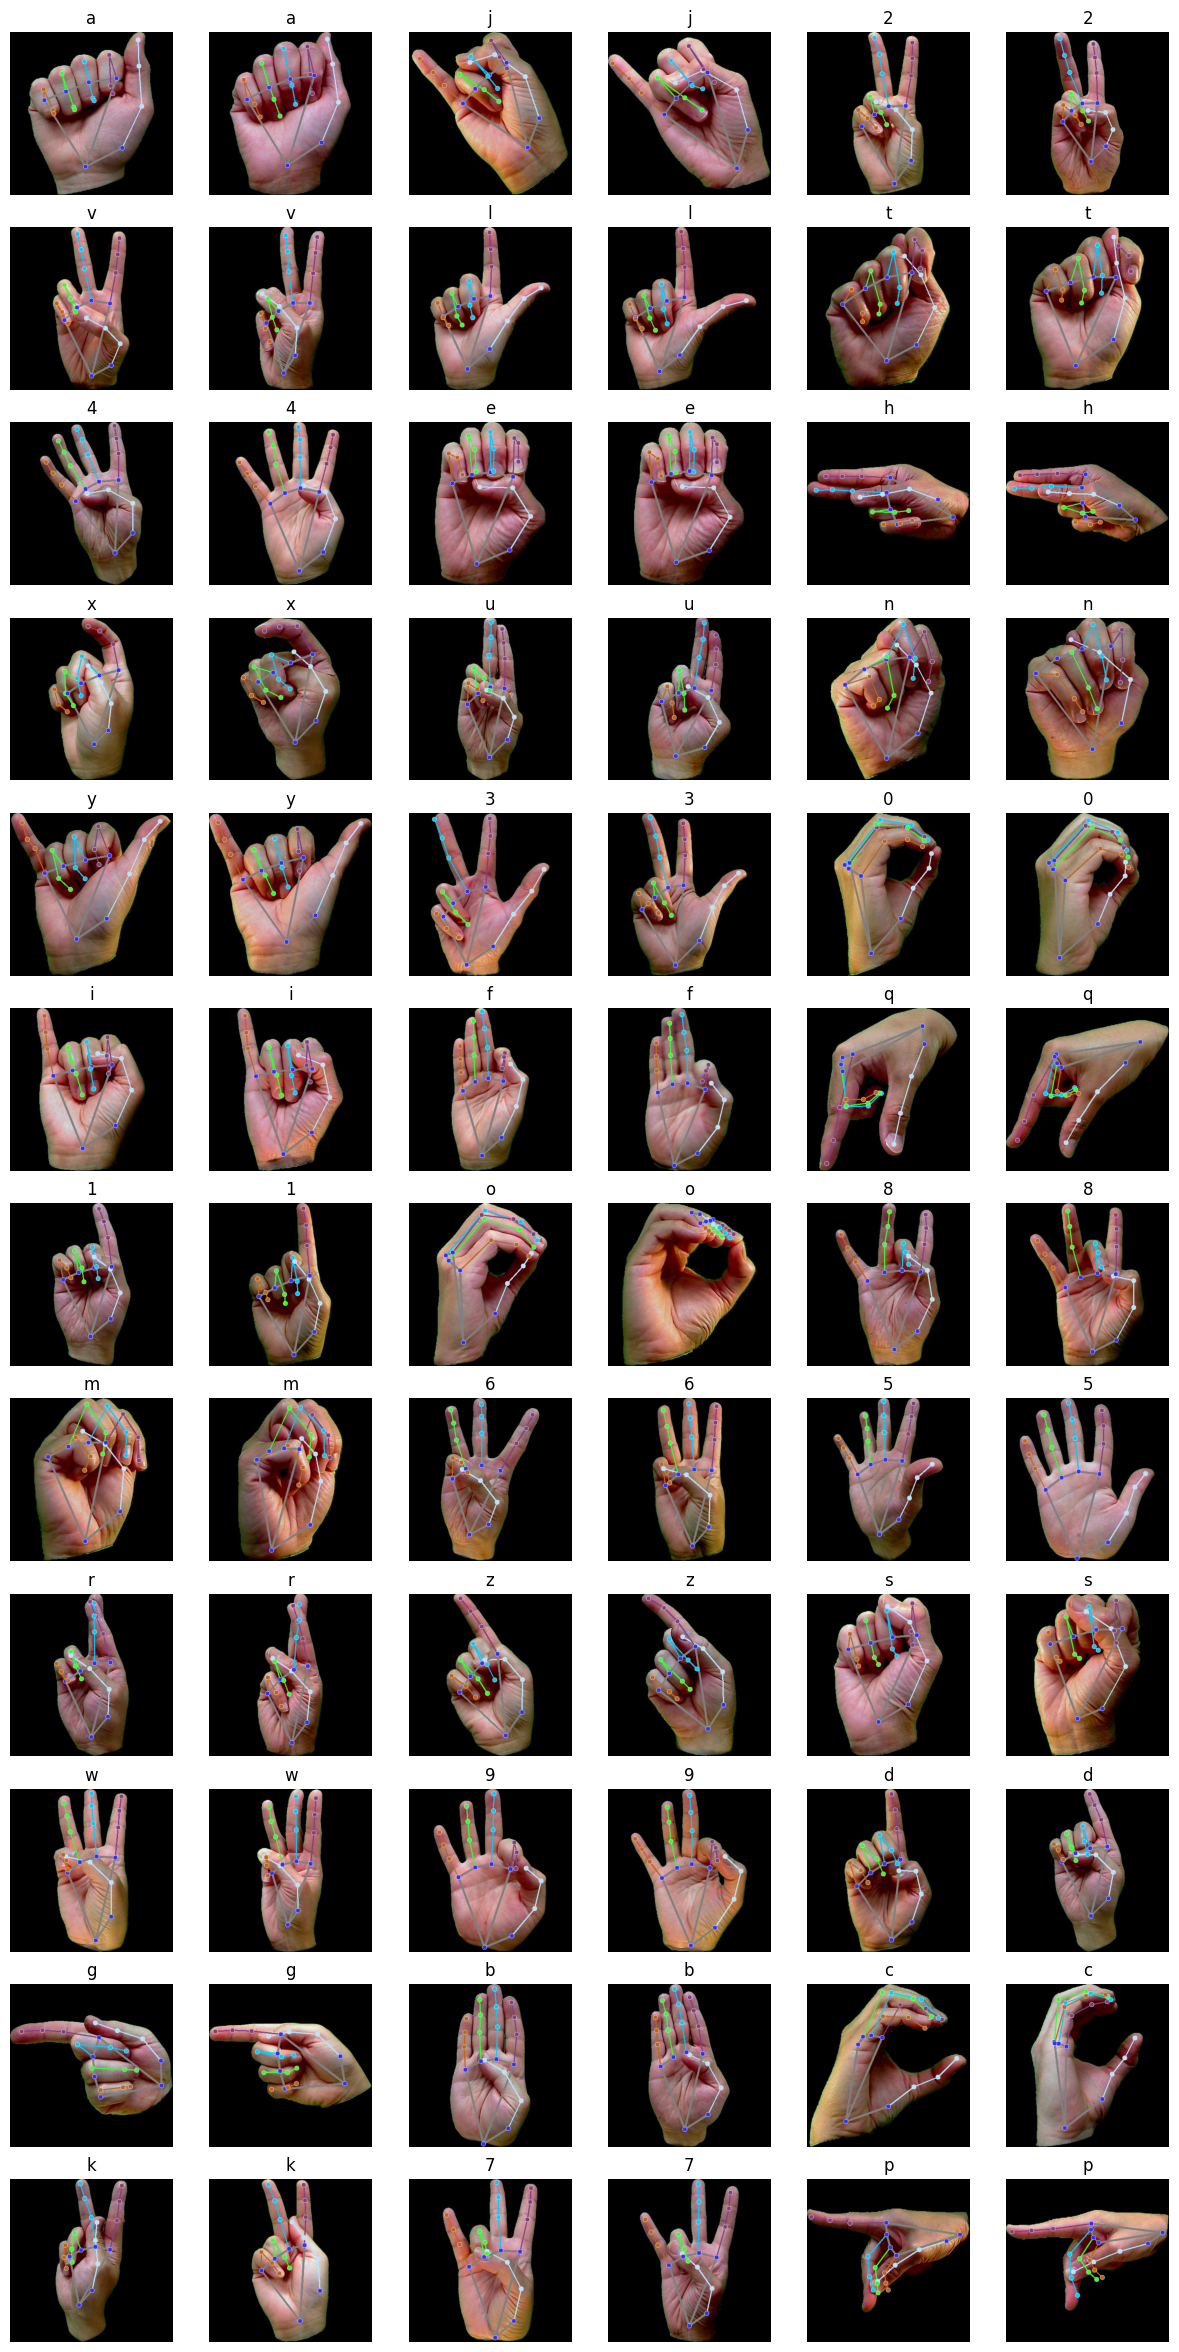

In [19]:
result = source_df.groupby('class').head(2)

plt.figure(figsize=(15, 30))
for i in range(72):
    plt.subplot(12, 6, i + 1)
    plt.imshow(result.iloc[i]['annotated_image'])
    plt.title(result.iloc[i]['class'])
    plt.axis("off")

plt.show()

In [20]:
# Compute the number of records in each class
print(dict(source_df.groupby('class').size()))

{'0': 61, '1': 67, '2': 70, '3': 70, '4': 67, '5': 70, '6': 60, '7': 63, '8': 64, '9': 68, 'a': 70, 'b': 70, 'c': 60, 'd': 70, 'e': 63, 'f': 70, 'g': 69, 'h': 69, 'i': 70, 'j': 61, 'k': 70, 'l': 70, 'm': 62, 'n': 65, 'o': 61, 'p': 64, 'q': 51, 'r': 66, 's': 70, 't': 65, 'u': 70, 'v': 69, 'w': 63, 'x': 63, 'y': 70, 'z': 63}


In [21]:
print(source_df[["class", "landmarks"]].head(10))

  class                                          landmarks
0     a  [[0.4750857651233673, 0.7176210284233093, -5.9...
1     a  [[0.4869779050350189, 0.7126662135124207, -8.3...
2     a  [[0.4949023723602295, 0.7398778200149536, -7.9...
3     a  [[0.47019529342651367, 0.7296124696731567, -5....
4     a  [[0.4602721929550171, 0.7611130475997925, -4.9...
5     a  [[0.4546840786933899, 0.728051483631134, -5.09...
6     a  [[0.4697216749191284, 0.7725297212600708, -5.4...
7     a  [[0.47870326042175293, 0.7452760934829712, -5....
8     a  [[0.5001174211502075, 0.7400509119033813, -8.5...
9     a  [[0.48884645104408264, 0.7030398845672607, -5....


In [22]:
# Create a dictionary mapping class names to numbers (indices)
encoded_df = source_df[['class','landmarks']].copy()
class_names = sorted(encoded_df['class'].unique())
num_classes = len(class_names)
class_to_index = {name: index for index, name in enumerate(class_names)}
print("Class to Index Mapping:", class_to_index)

# One-hot encode the 'class' column
encoded_df['class'] = encoded_df['class'].map(class_to_index)
encoded_df = pd.get_dummies(encoded_df, columns=['class'], prefix='', prefix_sep='')

print(encoded_df.head())

dataset = tf.data.Dataset.from_tensor_slices((
    np.stack(encoded_df['landmarks'].values),
    encoded_df.drop(columns=['landmarks']).values)).shuffle(len(encoded_df))

Class to Index Mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33, 'y': 34, 'z': 35}
                                           landmarks      0      1      2  \
0  [[0.4750857651233673, 0.7176210284233093, -5.9...  False  False  False   
1  [[0.4869779050350189, 0.7126662135124207, -8.3...  False  False  False   
2  [[0.4949023723602295, 0.7398778200149536, -7.9...  False  False  False   
3  [[0.47019529342651367, 0.7296124696731567, -5....  False  False  False   
4  [[0.4602721929550171, 0.7611130475997925, -4.9...  False  False  False   

       3      4      5      6      7      8  ...     26     27     28     29  \
0  False  False  False  False  False  False  ...  False  False  False  False   
1  False  False  False  False  False  

In [25]:
validation_split = 0.2
test_split = 0.1
batch_size = 25

# Calculate sizes for splitting
dataset_size = len(dataset)
val_size = int(validation_split * dataset_size)
test_size = int(test_split * dataset_size)
train_size = dataset_size - val_size - test_size

# Split the dataset
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size).take(test_size)
validation_dataset = dataset.skip(train_size + test_size)

# Optional: Prefetching for performance
train_dataset = train_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(test_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

print('Dataset size')
print(f'training: {train_size}  validation: {val_size}  test: {test_size}')

Dataset size
training: 1663  validation: 474  test: 237


In [26]:
# Training the model now
!pip install keras-tuner
from tensorflow import keras
from keras.models import Sequential  # Creating a stack of layers for the neural network
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling1D, BatchNormalization, Dropout, Layer
from keras_tuner import HyperModel  # HyperModel is used for defining hyperparameter optimization
from keras_tuner.tuners import RandomSearch, BayesianOptimization  # Automates hyperparameter tuning
from tensorflow.keras.callbacks import EarlyStopping  # Stops training early if the model stops improving

# Defines the total number of dense layer units to be distributed across the network during hyperparameter tuning
total_dense_units = 300

# Define a model builder function for hyperparameter tuning
def build_model(hp):
    """Defines a function to build the model. `hp` is a hyperparameter object
    provided by Keras Tuner for tuning parameters like layer size and dropout rates."""

    # Tunable number of units in the first dense layer
    dense_units_1 = hp.Int('dense_units_1', min_value=16, max_value=total_dense_units/2-8, step=16)
    # Tunable number of units in the second dense layer
    dense_units_2 = hp.Int('dense_units_2', min_value=16, max_value=total_dense_units/2-8, step=16)
    # Remaining units allocated to the third dense layer
    dense_units_3 = total_dense_units - dense_units_2 - dense_units_1

    # Defining the model structure
    model = Sequential([
        Input(shape=(landmarks_cnt, 3)),  # Input layer with shape (landmarks_count, 3) where 3 corresponds to x, y, z

        # Center all the records by subtracting the mean
        Lambda(lambda x: x - tf.reduce_mean(x, axis=1, keepdims=True), name='Centering_Layer'),
        Flatten(),  # Flatten the input into a 1D array
        BatchNormalization(axis=1),  # Normalize the data for faster and stable training

        # First dense layer with SELU activation
        Dense(units=dense_units_1, activation='selu'),
        # Tunable dropout rate for the first layer
        Dropout(hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)),

        # Second dense layer with SELU activation
        Dense(units=dense_units_2, activation='selu'),
        # Tunable dropout rate for the second layer
        Dropout(hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)),

        # Third dense layer with SELU activation
        Dense(units=dense_units_3, activation='selu'),
        # Tunable dropout rate for the third layer
        Dropout(hp.Float('dropout3', min_value=0.1, max_value=0.5, step=0.1)),

        # Output layer with Softmax activation for multi-class classification
        Dense(num_classes, activation='softmax', name='Softmax')
    ])

    # Compile the model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set up the tuner for hyperparameter optimization
tuner = BayesianOptimization(
    build_model,  # The model building function
    objective='val_accuracy',  # The metric to optimize
    max_trials=30,  # Number of models to try
    executions_per_trial=3,  # Number of times each model is trained
    directory='my_dir',  # Directory to store tuning results
    project_name='pose_estimation_tuning',  # Project name for tuning
    overwrite=True  # Overwrite previous results if any
)

# Stop training if validation loss does not improve for 3 consecutive epochs
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Search for the best hyperparameters
tuner.search(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=[stop_early])

# Retrieve the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]  # The model with the best performance
best_hp = tuner.get_best_hyperparameters()[0]  # The best hyperparameter configuration


Trial 30 Complete [00h 00m 29s]
val_accuracy: 0.9528832832972208

Best val_accuracy So Far: 0.9739802877108256
Total elapsed time: 00h 14m 02s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
tuner.results_summary(5)

Results summary
Results in my_dir/pose_estimation_tuning
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 16 summary
Hyperparameters:
dense_units_1: 80
dense_units_2: 128
dropout1: 0.1
dropout2: 0.1
dropout3: 0.30000000000000004
Score: 0.9739802877108256

Trial 18 summary
Hyperparameters:
dense_units_1: 80
dense_units_2: 128
dropout1: 0.1
dropout2: 0.1
dropout3: 0.4
Score: 0.9662447174390157

Trial 17 summary
Hyperparameters:
dense_units_1: 112
dense_units_2: 128
dropout1: 0.2
dropout2: 0.1
dropout3: 0.4
Score: 0.9655415018399557

Trial 20 summary
Hyperparameters:
dense_units_1: 112
dense_units_2: 128
dropout1: 0.1
dropout2: 0.1
dropout3: 0.30000000000000004
Score: 0.9655414819717407

Trial 13 summary
Hyperparameters:
dense_units_1: 96
dense_units_2: 112
dropout1: 0.1
dropout2: 0.2
dropout3: 0.4
Score: 0.9641350309054056


In [28]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Centering_Layer (Lambda)             │ (None, 21, 3)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 63)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63)                  │             252 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 80)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 92)                  │          11,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 92)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ (None, 36)                  │           3,348 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,956 (120.92 KB)

 Trainable params: 30,830 (120.43 KB)

 Non-trainable params: 126 (504.00 B)

In [29]:
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling1D, BatchNormalization, Dropout, Layer , LayerNormalization

model = Sequential([
    Input(shape=(landmarks_cnt, 3)),
    LayerNormalization(axis=1 , scale=False),
    #Lambda(lambda x: x - tf.reduce_mean(x, axis=1, keepdims=True), name='Centering_Layer'),
    Flatten(),
    LayerNormalization(axis=1),
    Dense(80, activation='elu'),
    Dropout(.1),
    Dense(96, activation='elu'),
    Dropout(.4),
    Dense(124, activation='elu'),
    Dropout(.1),
    Dense(num_classes, activation='softmax', name='Softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer_normalization                  │ (None, 21, 3)               │              21 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 63)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 63)                  │             126 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 80)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 96)                  │           7,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 124)                 │          12,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ (None, 36)                  │           4,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,571 (115.51 KB)

 Trainable params: 29,571 (115.51 KB)

 Non-trainable params: 0 (0.00 B)

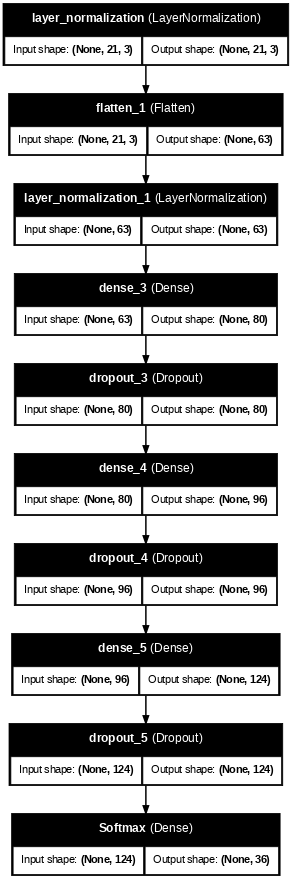

In [30]:
from keras.utils import plot_model

plot_model(model=model, show_shapes=True, dpi=54, show_layer_names=True)

In [31]:
history = model.fit(train_dataset, epochs=150, verbose=1, validation_data=validation_dataset)

Epoch 1/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2000 - loss: 3.0887 - val_accuracy: 0.6962 - val_loss: 1.3354
Epoch 2/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5948 - loss: 1.2810 - val_accuracy: 0.8502 - val_loss: 0.6127
Epoch 3/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7617 - loss: 0.7890 - val_accuracy: 0.8861 - val_loss: 0.4173
Epoch 4/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8007 - loss: 0.5792 - val_accuracy: 0.8987 - val_loss: 0.2884
Epoch 5/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8488 - loss: 0.4400 - val_accuracy: 0.9177 - val_loss: 0.2320
Epoch 6/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8752 - loss: 0.3595 - val_accuracy: 0.9093 - val_loss: 0.2345
Epoch 7/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8760 - loss: 0.3288 - val_accuracy: 0.9008 - val_loss: 0.2388
Epoch 8/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8948 - loss: 0.3004 - val_accuracy: 0.9346 - v

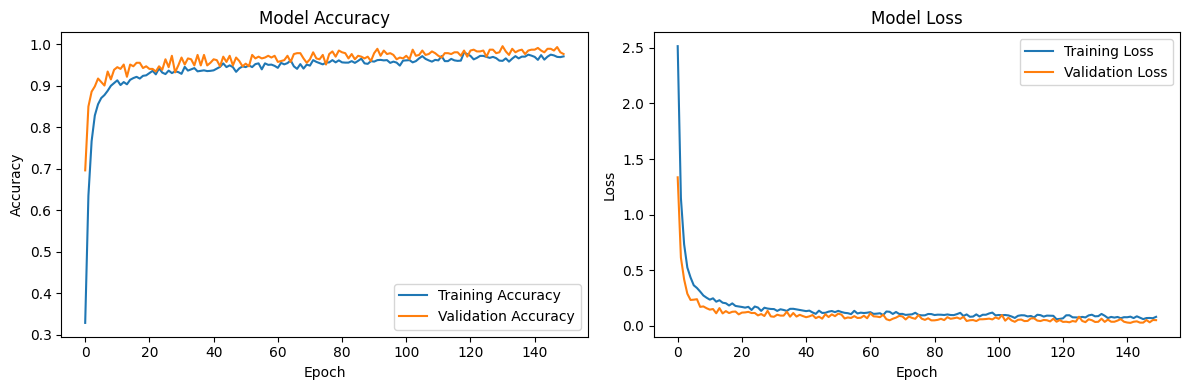

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9705 - loss: 0.0648
Test Loss: 0.06484139710664749
Test Accuracy: 0.9704641103744507


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


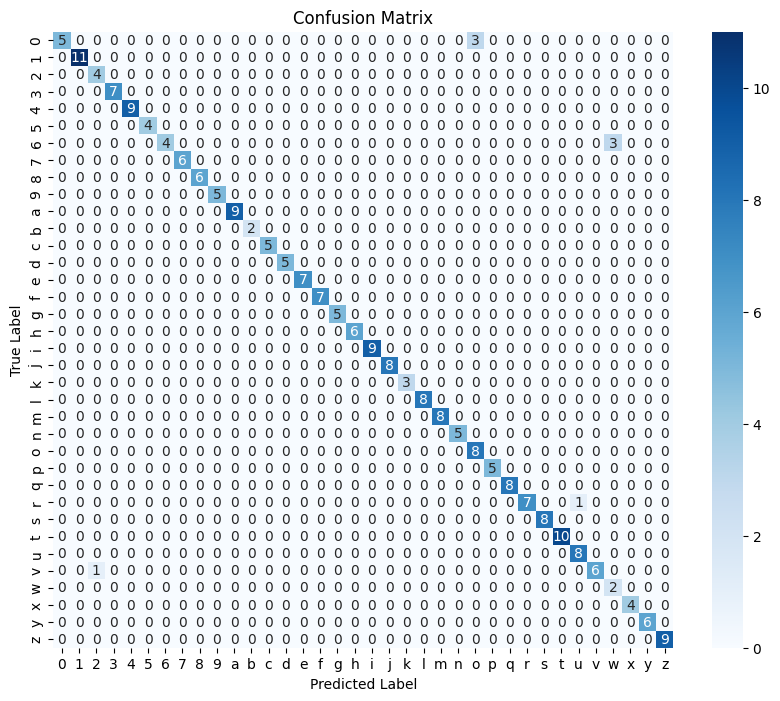

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

landmarks, labels = list(test_dataset.as_numpy_iterator())[0]
true_labels = np.argmax(labels, axis=1)
predictions = model.predict(landmarks)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [35]:

#model.save('model1.keras')
#model.save_weights('model1.h5')
#model.export(r"C:\Users\inonz\Desktop\pythone\dataset\model1" )

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# המרה ל-TensorFlow Lite
tflite_model = converter.convert()

# שמור את המודל כקובץ .tflite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp7o7hco8a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21, 3), dtype=tf.float32, name='keras_tensor_13')
Output Type:
  TensorSpec(shape=(None, 36), dtype=tf.float32, name=None)
Captures:
  140503502561072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502567936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502554736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502554208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502564064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502553152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502564240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502563712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502293296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502297344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140503502304736:

In [36]:
#will implement this in a separate model

import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf

# Load the trained model (architecture + weights)
# model = tf.keras.models.load_model('model.h5')

# Define class names for numbers and lowercase letters
class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
    'u', 'v', 'w', 'x', 'y', 'z'
]

# Initialize MediaPipe hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=2, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Open the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Ignoring empty camera frame.")
        continue

    # Flip the image horizontally for a later selfie-view display
    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame to detect hand landmarks
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            # Identify if it's the right or left hand
            label = handedness.classification[0].label  # 'Right' or 'Left'

            # Draw hand landmarks on the frame
            mp_drawing.draw_landmarks(
                frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract landmarks as a numpy array
            landmarks = [[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]
            landmarks = np.array(landmarks).reshape(1, -1, 3)

            # Predict the hand sign using the model
            prediction = model.predict(landmarks)
            predicted_class = np.argmax(prediction)
            predicted_label = class_names[predicted_class]

            # Display the predicted label on the frame (larger size)
            cv2.putText(frame, f'{label}: {predicted_label}', (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 4, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('Hand Sign Detection', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close the window
cap.release()
cv2.destroyAllWindows()


Accuracy: 0.9662
F1 Score: 0.9610
Precision: 0.9671
Recall: 0.9702


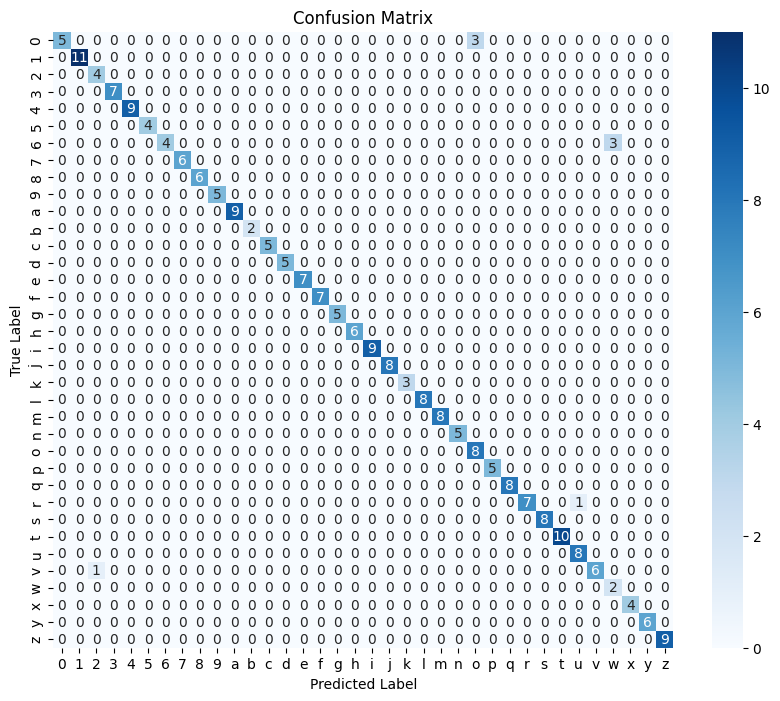

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `predictions` are your model's predicted labels and `true_labels` are the actual labels.
# Both should be numpy arrays or lists.

# Example: true_labels and predicted_labels
# true_labels = np.array([actual labels of the test set])
# predicted_labels = model.predict(test_dataset)
# predicted_labels = np.argmax(predicted_labels, axis=1)  # In case of multi-class classification

# For the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# F1 Score (macro average is used for multi-class)
f1 = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1 Score: {f1:.4f}")

# Precision Score
precision = precision_score(true_labels, predicted_labels, average='macro')
print(f"Precision: {precision:.4f}")

# Recall Score
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f"Recall: {recall:.4f}")

# Display confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
